## Fetch California Housing

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-09-18 00:18:30.241234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()

In [3]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

### Standardizing the data

In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_valid = scalar.fit_transform(X_valid)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
X_train.shape

(11610, 8)

### Model creation and training

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]), #Hidden layer 1
    keras.layers.Dense(30,activation="relu"), # Hidden layer 2
    keras.layers.Dense(1) # Output layer
    
])

2023-09-18 00:25:01.723279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3), # learning rate = 0.01
             metrics=['mae'])

/Users/maddhujasen27/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 734us/step - loss: 0.4009 - mae: 0.4549 - val_loss: 0.4603 - val_mae: 0.4985
Epoch 2/20
363/363 [==============================] - 0s 665us/step - loss: 0.3977 - mae: 0.4518 - val_loss: 0.4616 - val_mae: 0.5042
Epoch 3/20
363/363 [==============================] - 0s 663us/step - loss: 0.3948 - mae: 0.4510 - val_loss: 0.4577 - val_mae: 0.4956
Epoch 4/20
363/363 [==============================] - 0s 663us/step - loss: 0.3923 - mae: 0.4486 - val_loss: 0.4560 - val_mae: 0.4978
Epoch 5/20
363/363 [==============================] - 0s 661us/step - loss: 0.3897 - mae: 0.4469 - val_loss: 0.4518 - val_mae: 0.4940
Epoch 6/20
363/363 [==============================] - 0s 664us/step - loss: 0.3875 - mae: 0.4458 - val_loss: 0.4517 - val_mae: 0.4917
Epoch 7/20
363/363 [==============================] - 0s 664us/step - loss: 0.3853 - mae: 0.4440 - val_loss: 0.4489 - val_mae: 0.4918
Epoch 8/20
363/363 [==============================] - 0s 663us

### Testing the model

In [23]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 465us/step - loss: 0.3844 - mae: 0.4500


In [24]:
model_history.history

{'loss': [0.4008530378341675,
  0.3976939618587494,
  0.3948094844818115,
  0.39229145646095276,
  0.38974273204803467,
  0.38748085498809814,
  0.38534966111183167,
  0.38340163230895996,
  0.3815588355064392,
  0.3799131214618683,
  0.37856772541999817,
  0.3767510950565338,
  0.37547752261161804,
  0.3741186857223511,
  0.3727470934391022,
  0.3715980052947998,
  0.37052780389785767,
  0.36932894587516785,
  0.36804449558258057,
  0.3672800362110138],
 'mae': [0.45488470792770386,
  0.4517582058906555,
  0.450961709022522,
  0.4485943615436554,
  0.446930855512619,
  0.4457656145095825,
  0.4439937174320221,
  0.4428066909313202,
  0.4421711266040802,
  0.44026756286621094,
  0.4393477737903595,
  0.43819281458854675,
  0.4372333884239197,
  0.43629392981529236,
  0.43541422486305237,
  0.4349753260612488,
  0.4339789152145386,
  0.4331706464290619,
  0.43193215131759644,
  0.4315248727798462],
 'val_loss': [0.4602876901626587,
  0.46157804131507874,
  0.4576704204082489,
  0.455972

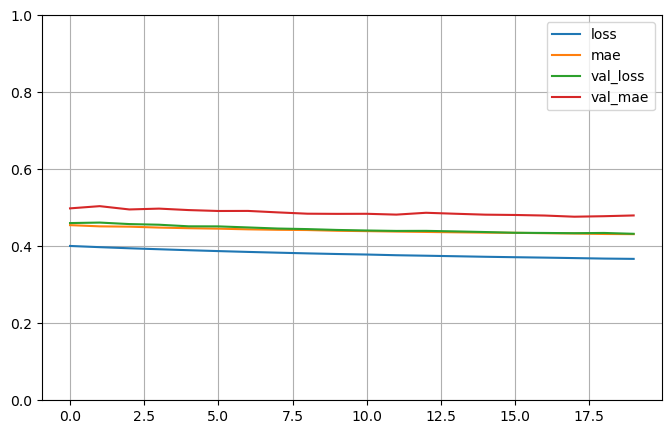

In [25]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
X_new = X_test[:3]
X_new

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ],
       [-0.69738315,  0.09834786, -0.14086589,  0.17205266,  0.13229717,
        -0.17390163, -0.20888265,  0.0337006 ],
       [-0.19475766,  1.85735988, -0.54547279,  0.15860488, -0.09942866,
        -0.98514082,  1.03333558, -1.45168768]])

### Making predictions

In [27]:
y_pred = model.predict(X_new)
print(y_pred)
y_test[:3]

1/1 [==============================] - 0s 61ms/step
[[0.70704645]
 [1.7858338 ]
 [4.4936275 ]]


array([0.477  , 0.458  , 5.00001])